# Visualizing Sustainability Metrics Data using novel STG 
<!-- Sharif Ahmed -->

In [1]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
allz = pd.read_pickle('../data/interim/fts/allz.pkl')

## STG 

In [5]:
FONTSIZE=8

class STG(object):
    def __init__(self,df, LIM=-1, title='Untitled',x_factor =1, ):
        self.df= df
        self.rsg =pd.DataFrame()
        self.i=0
        self.x_factor = x_factor
        self.LIM = LIM
        self.title = title
        if title.lower() == 'untitled':
            sy,sm = df.tkz_created.min()
            ey,ym = df.tkz_created.max()
            period = f'{sy}/{sm}-{ey}/{ym}'
            self.title = ' '.join([df.project.unique()[0], period])   
    

    def temporalSTG(self,sr):
        iclz = sr.apply(lambda t: np.log(t.total_seconds()))
        iclz =iclz.fillna(0).apply(self.expand)
        return iclz

    def addComponent(self,s,):
        
        self.rsg[self.i]=s
        self.i+=1;
    
    def expand(self, s, factor=None, bar=False):

        if factor == None:
            factor=self.x_factor

            
        if s==0:
            return [0]
        elif bar:
            
            x = 2+round(s)* factor
            return [s/2]+[s]*x+[s/2]
        else:
            s = round(s)* factor 
            ret = [0.00]*s
            
            return ret
        
    def flattened_array(self,df ):
        df = df.T        
        temp = np.concatenate([df[col].apply(lambda x: np.array(x) if isinstance(x, list) else [x]).values.flatten() for col in df.columns])        
        ret = np.concatenate(temp)        
        return ret
    
   
    
    
    def report(self, sharexy=True, prefix=''): 
        if self.LIM==-1:
            self.LIM=len(self.df)
       
        leads = dict()
        self.rsg= pd.DataFrame()
        self.i=0
        
        self.addComponent(0)                
        self.addComponent(self.df["#created_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["#closed_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["closure_duration_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Issues'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(float(1)*self.df['is_useful_is'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["is_toxic_is"])               
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["closure_duration_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Altruism'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["#created_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["#closed_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["closure_duration_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['PRs'] =self.flattened_array(self.rsg[:])

        self.addComponent(0)                
        self.addComponent(float(1)*self.df['is_useful_pr'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["is_toxic_pr"])               
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["closure_duration_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Utility'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["#commits"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["#authors"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["unit_interfacing"])               
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["cyclomatic_complexity_md"])               
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["method_size"])               
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Commits'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["#dev_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["comments_total_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['#Dev vs Response I '] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["#dev_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["comments_total_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['#Dev vs Response P'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["new_label_count_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["label_counts_md_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Labels I'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["new_label_count_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["label_counts_md_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Labels PR'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["is_newcomer_suport"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["is_deduplicated"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Newcomer'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(float(1)*self.df['cr_senti_is'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(float(1)*self.df['cr_senti_pr'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Sentiment'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['title_readability_md_is'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['readability_from_cmt_is'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['readability_is'])
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Readability I'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['title_readability_md_pr'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['readability_from_cmt_pr'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(float(0.01)*self.df['readability_pr'])
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Readability P '] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["total_emoji_reactions_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["react_total_count_from_cmt"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.df["total_emoji_reactions_pr"].apply(np.log))            
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['Emoji Reactions'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(float(1)*self.df['affiliation_diversity'])
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["#parents"])               
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['DEI dev C'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["gender_diversity_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["geo_diversity_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['DEI dev I'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["gender_diversity_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["geo_diversity_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['DEI dev PR'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["association_diversity_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["utype_diversity_is"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_is"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['DEI role I'] =self.flattened_array(self.rsg[:])

        self.rsg= pd.DataFrame()
        self.i=0
        self.addComponent(0)                
        self.addComponent(self.df["association_diversity_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(-1*self.df["utype_diversity_pr"].apply(np.log))            
        self.addComponent(0)

        self.addComponent(0)                
        self.addComponent(self.temporalSTG(self.df["response_time_pr"]))
        self.addComponent(0)

        self.rsg.fillna(0,inplace=True)
        self.addComponent(None)


        leads['DEI role PR'] =self.flattened_array(self.rsg[:])
        



        from matplotlib.ticker import AutoMinorLocator, AutoLocator

       
        
        W = self.LIM/12        
        W=max(1,W/2)
        
        fig, axs = plt.subplots(len(leads.keys()), 1, figsize=(W*11.69, 8.27), sharex=sharexy, sharey=0)
        
 
        keys= list(leads.keys())
        for i, ax in enumerate(axs.flat): 
           
            ax.minorticks_on()
            ax.xaxis.set_minor_locator(AutoMinorLocator(10))  
            ax.yaxis.set_minor_locator(AutoMinorLocator(10))
            ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
            ax.grid(which='minor', linestyle='-', linewidth='0.5', color=(1, 0.7, 0.7))
            
            
            if keys[i]=='CommitsX':
                ax.bar(range(len(leads[keys[i]])),leads[keys[i]],color='black', label=keys[i])
            else:
                ax.plot(leads[keys[i]],color='black', label=keys[i])
            ax.grid(True, color='red')             
            
            ax.legend(loc='upper right')

        plt.suptitle(self.title)         
        if 'x' not in prefix.lower():    
            
            plt.savefig('../stg_ann/'+prefix+' '+self.df.project.unique()[0]+'.png')
        plt.show()
        plt.close()
        
        
 

## Software susTainability Graph (STG)


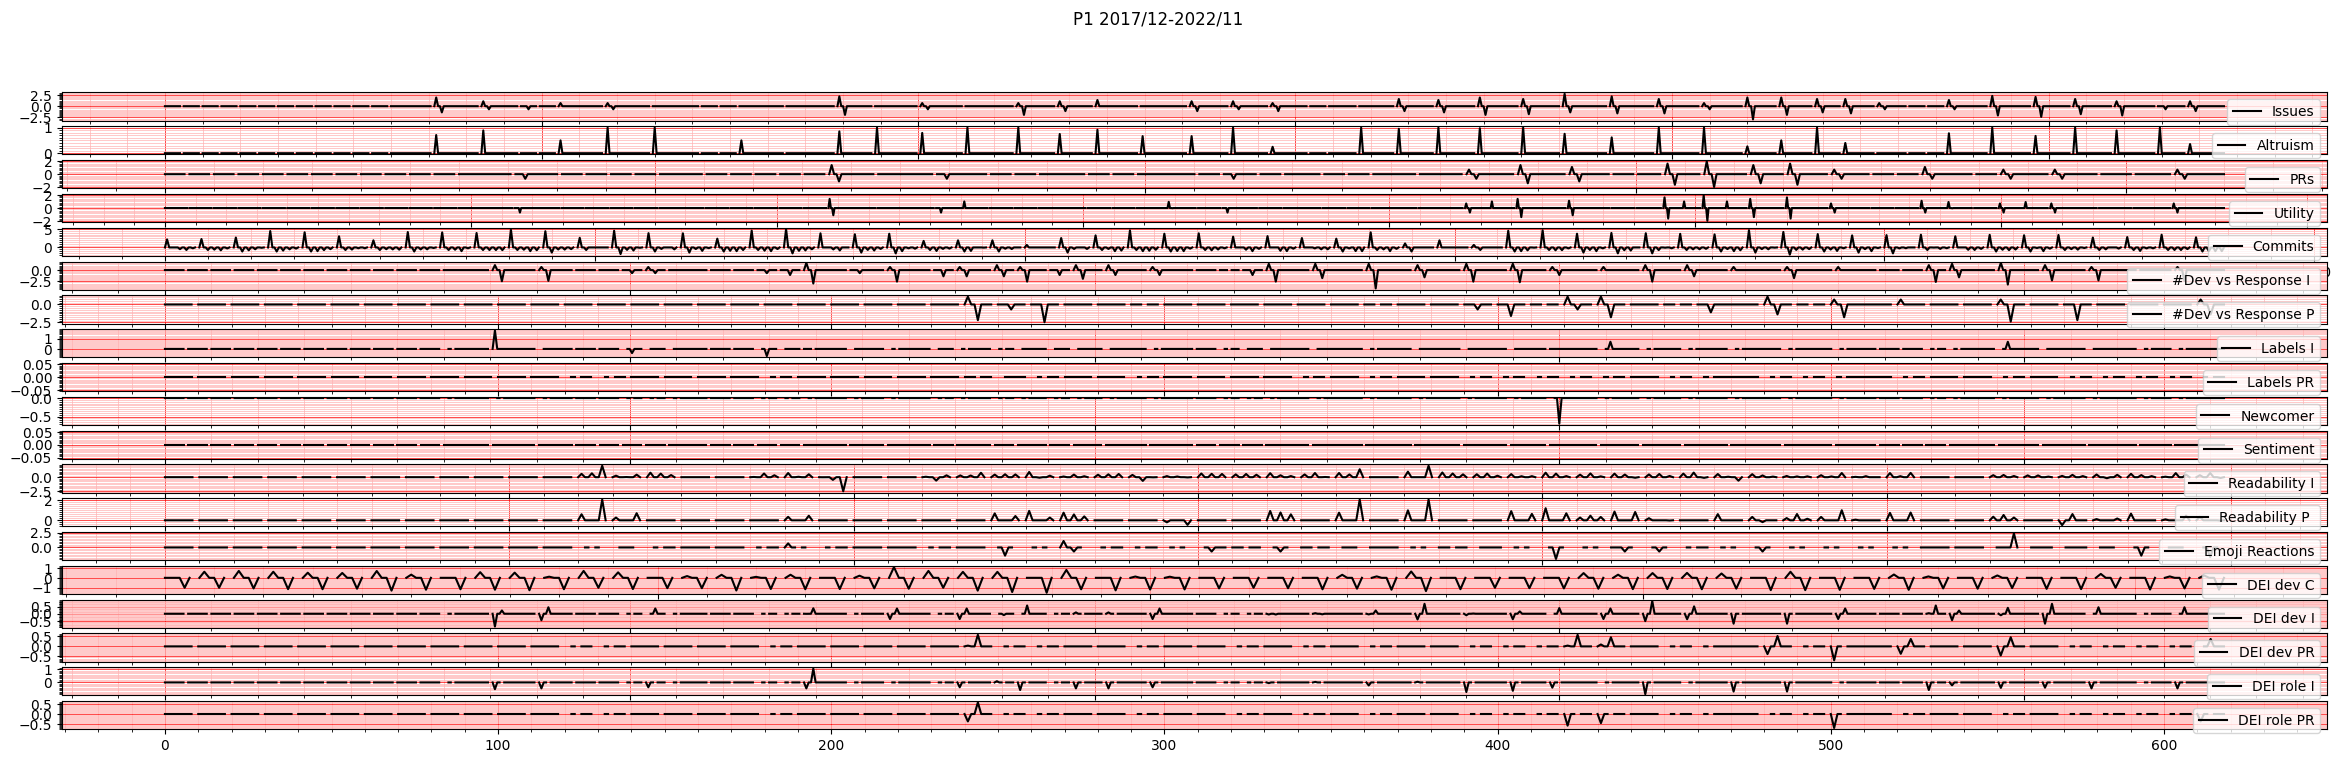

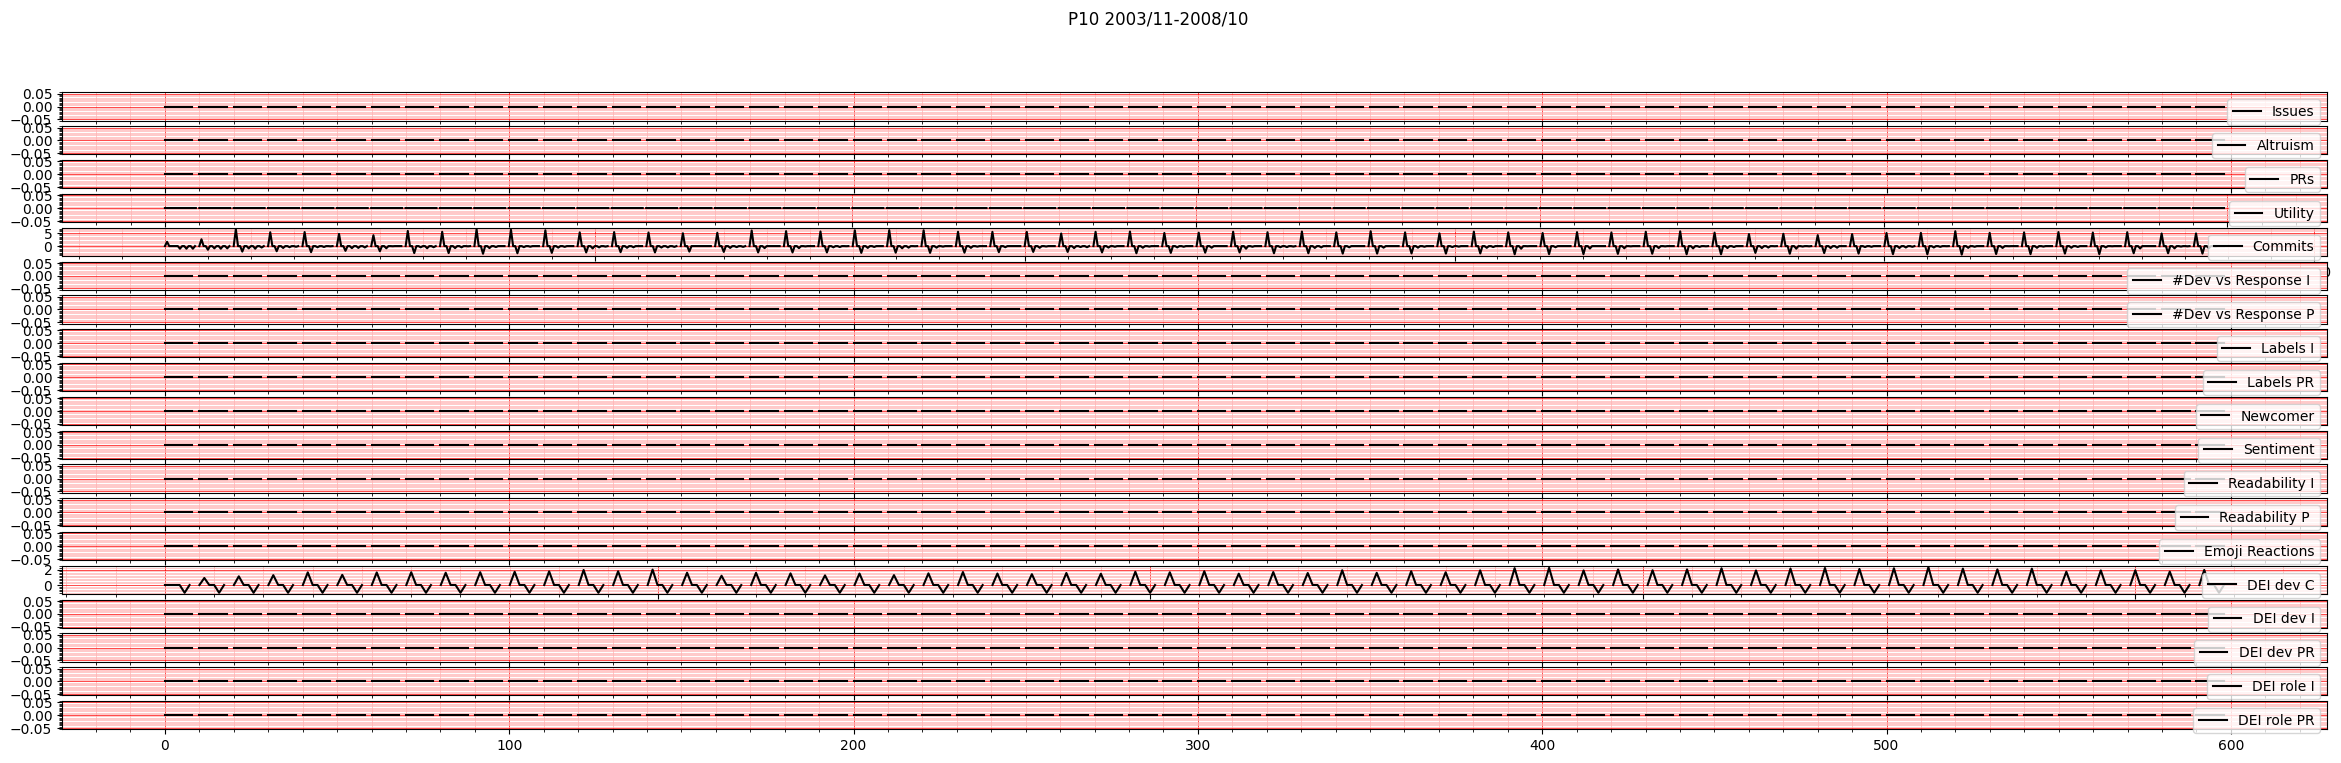

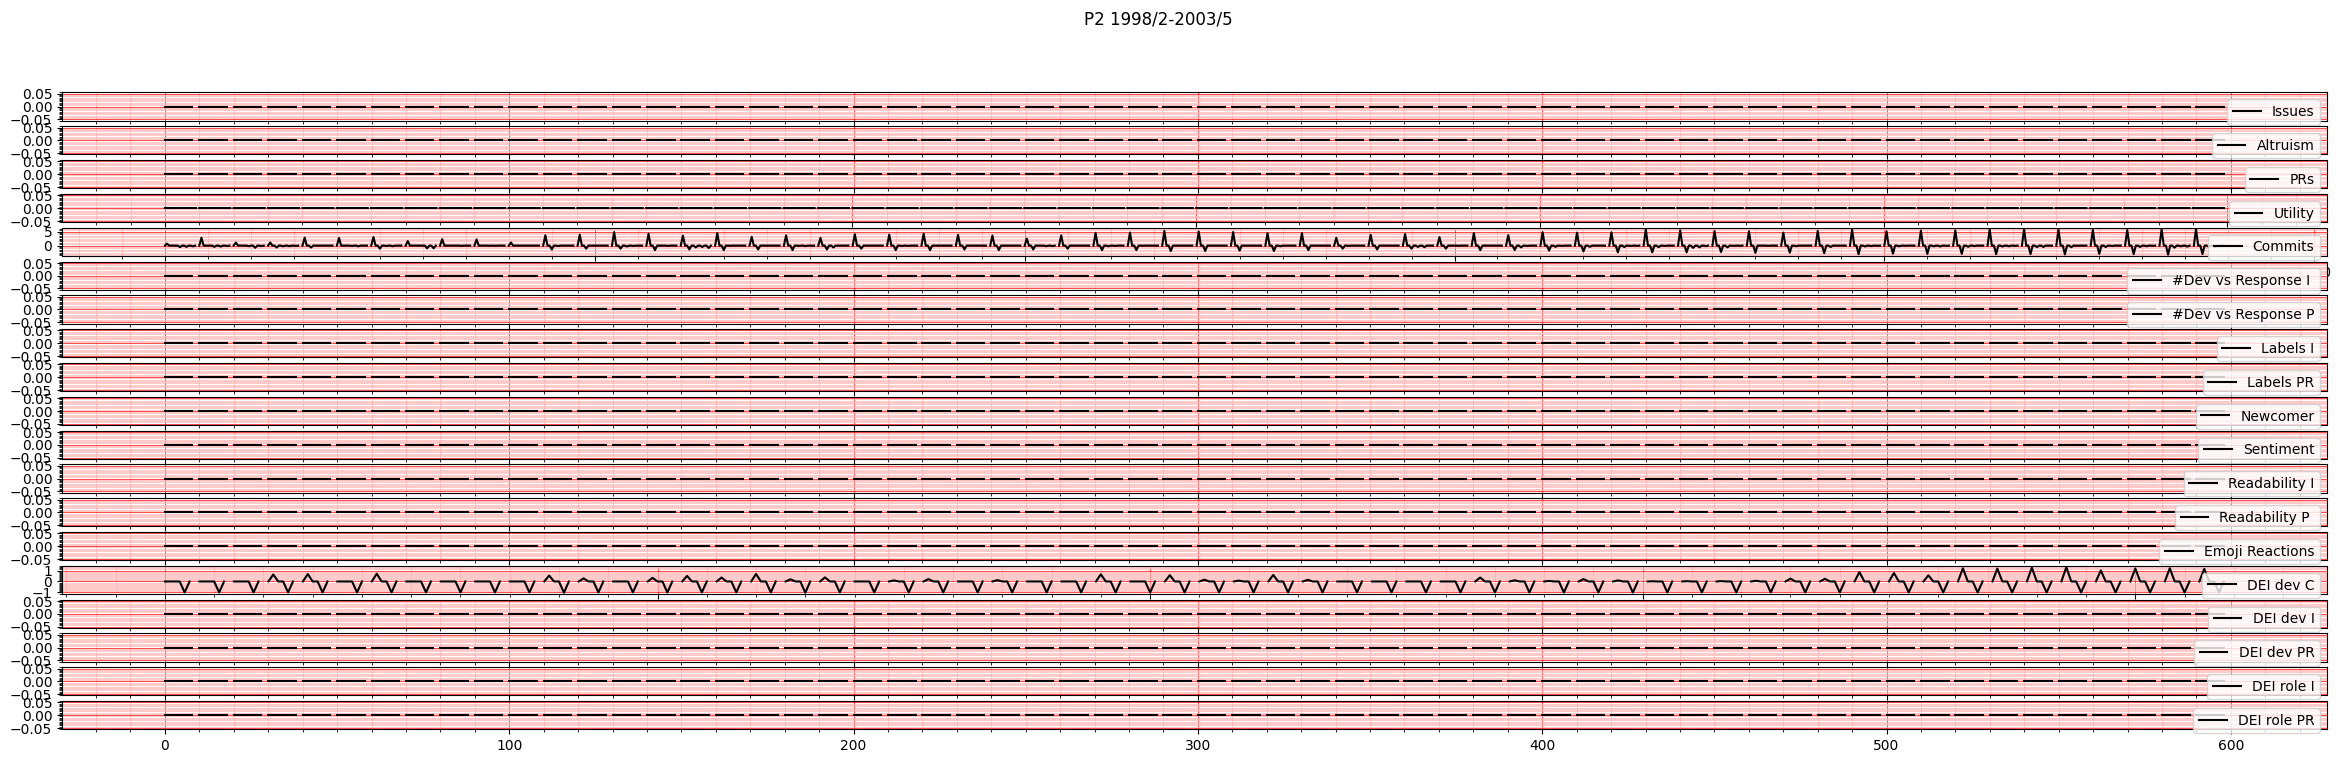

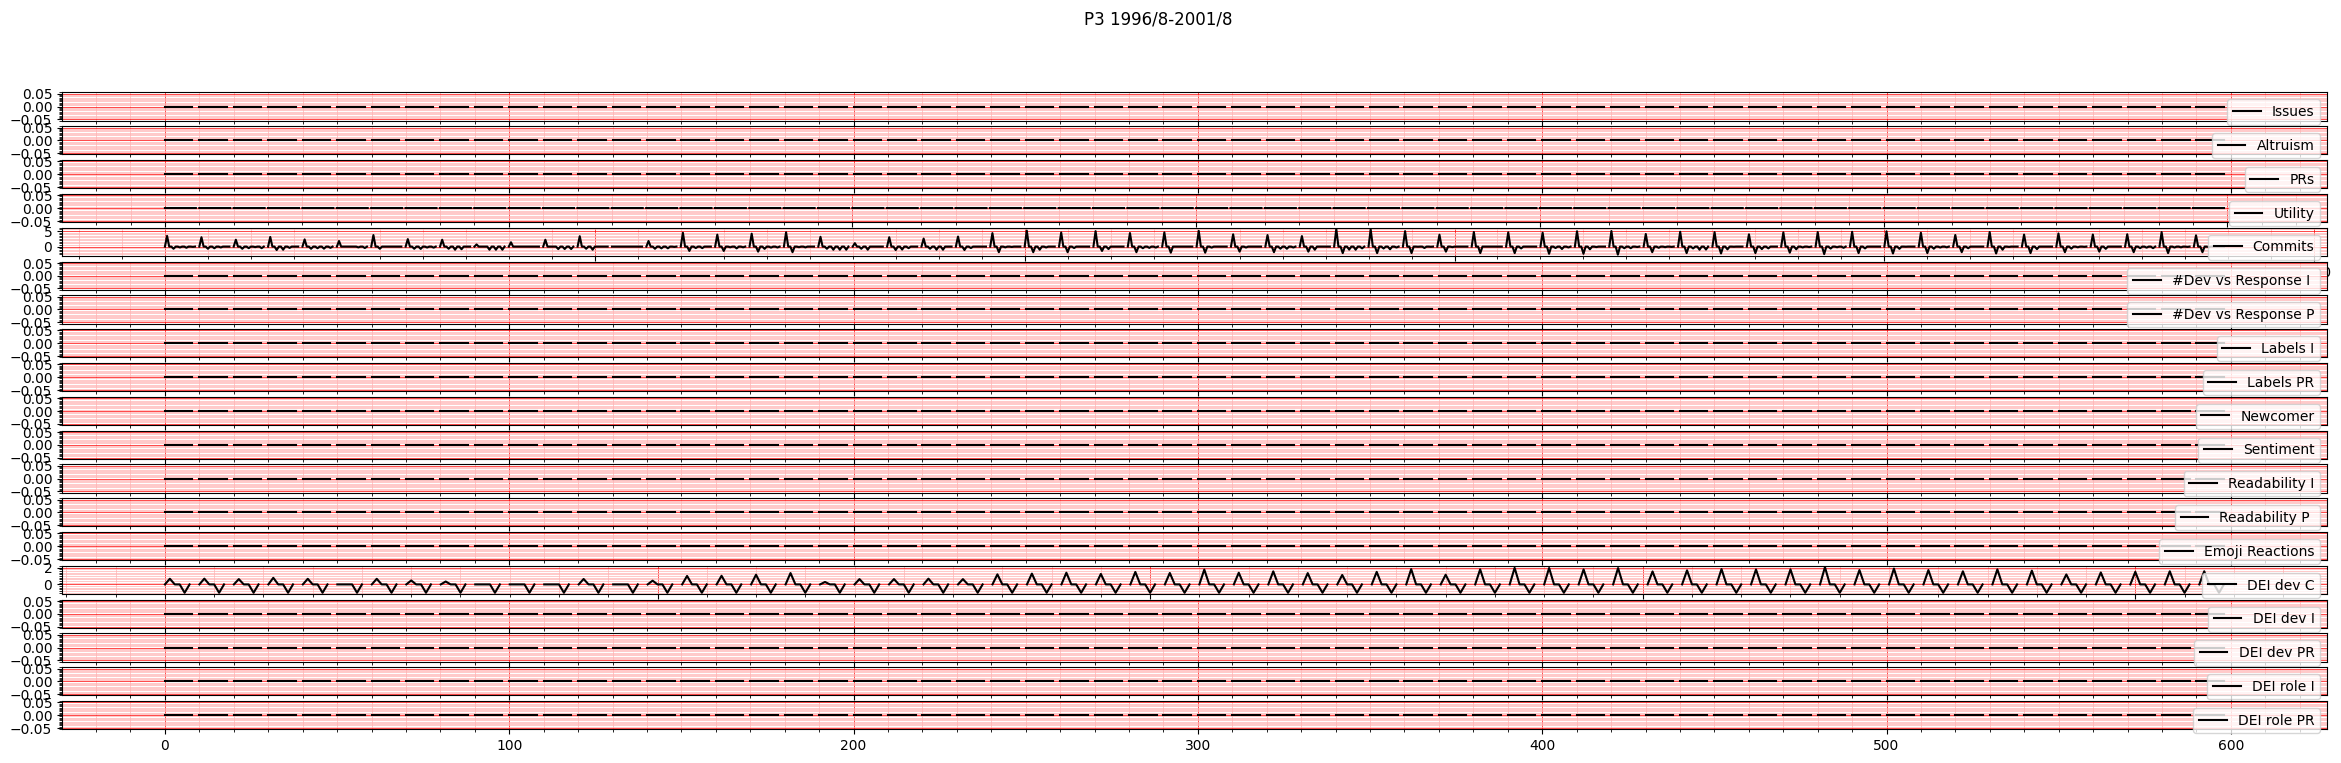

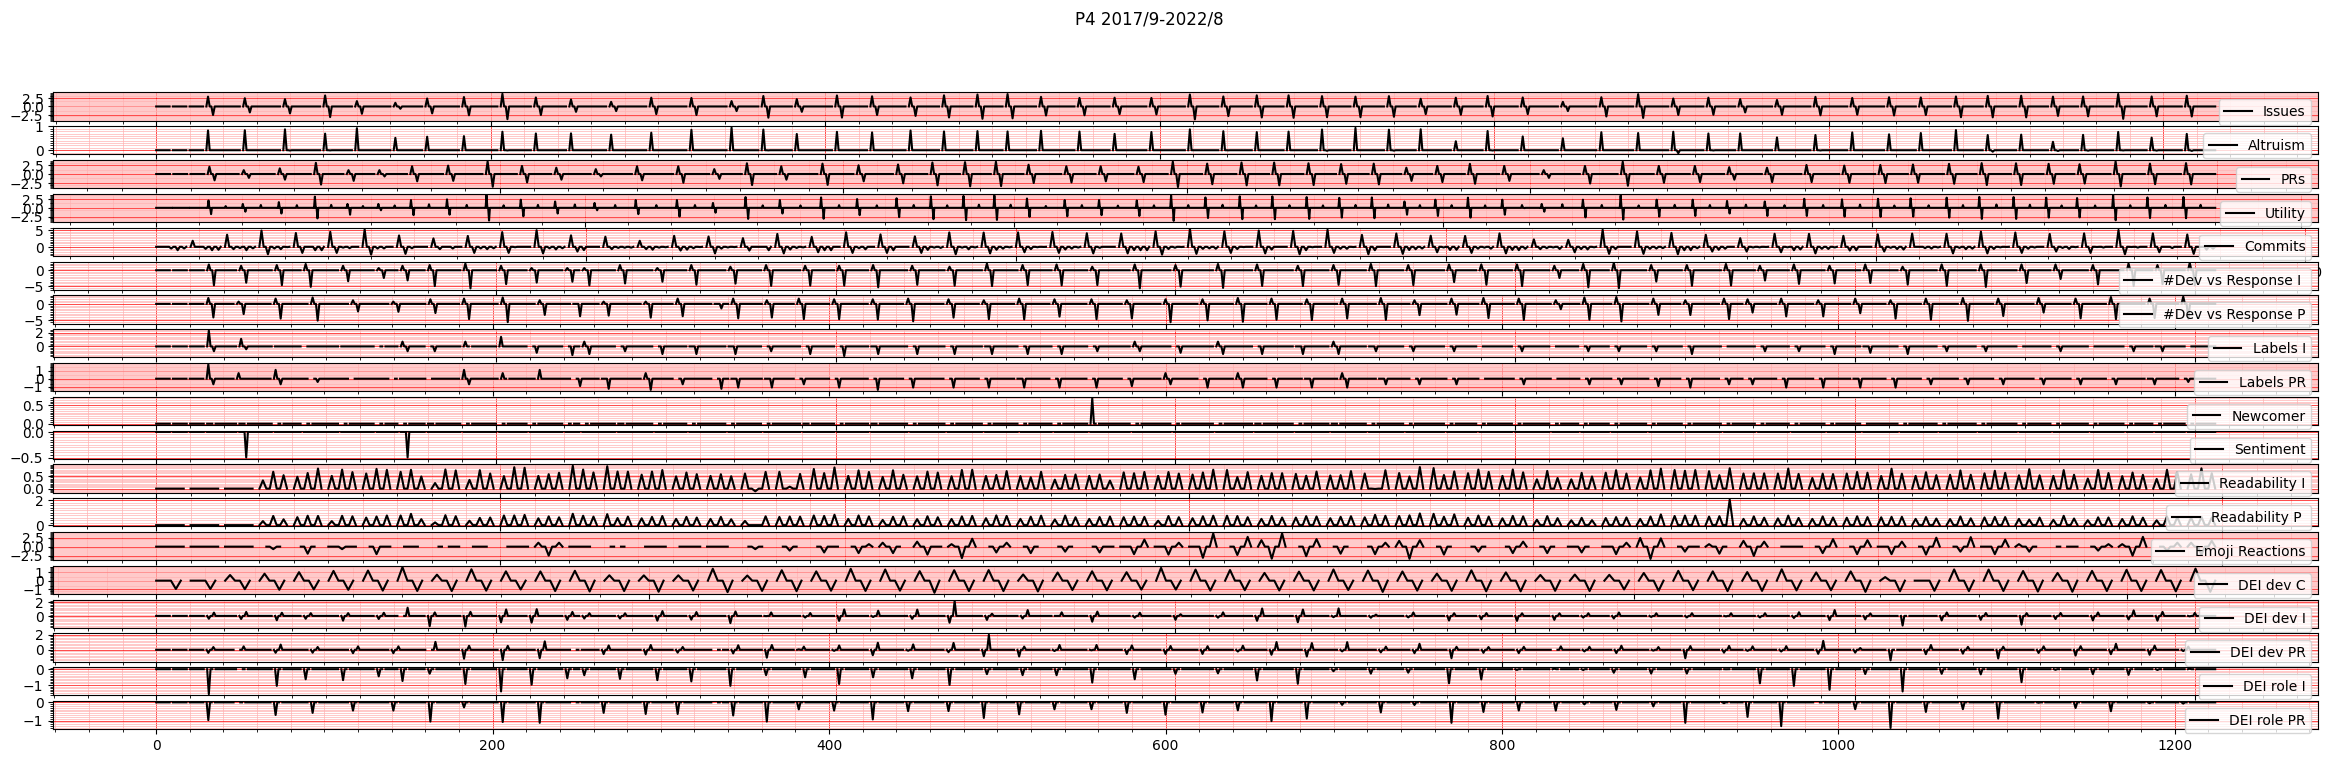

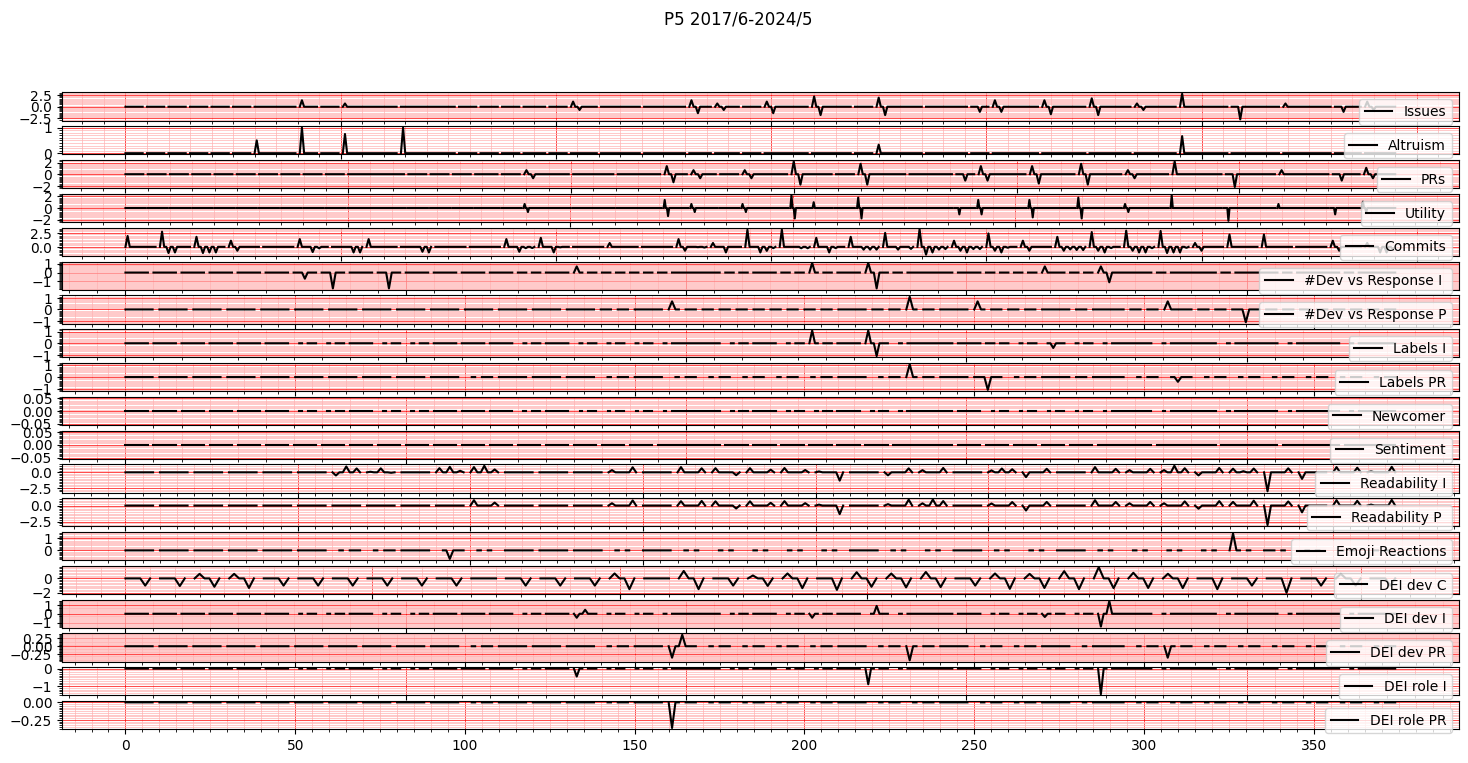

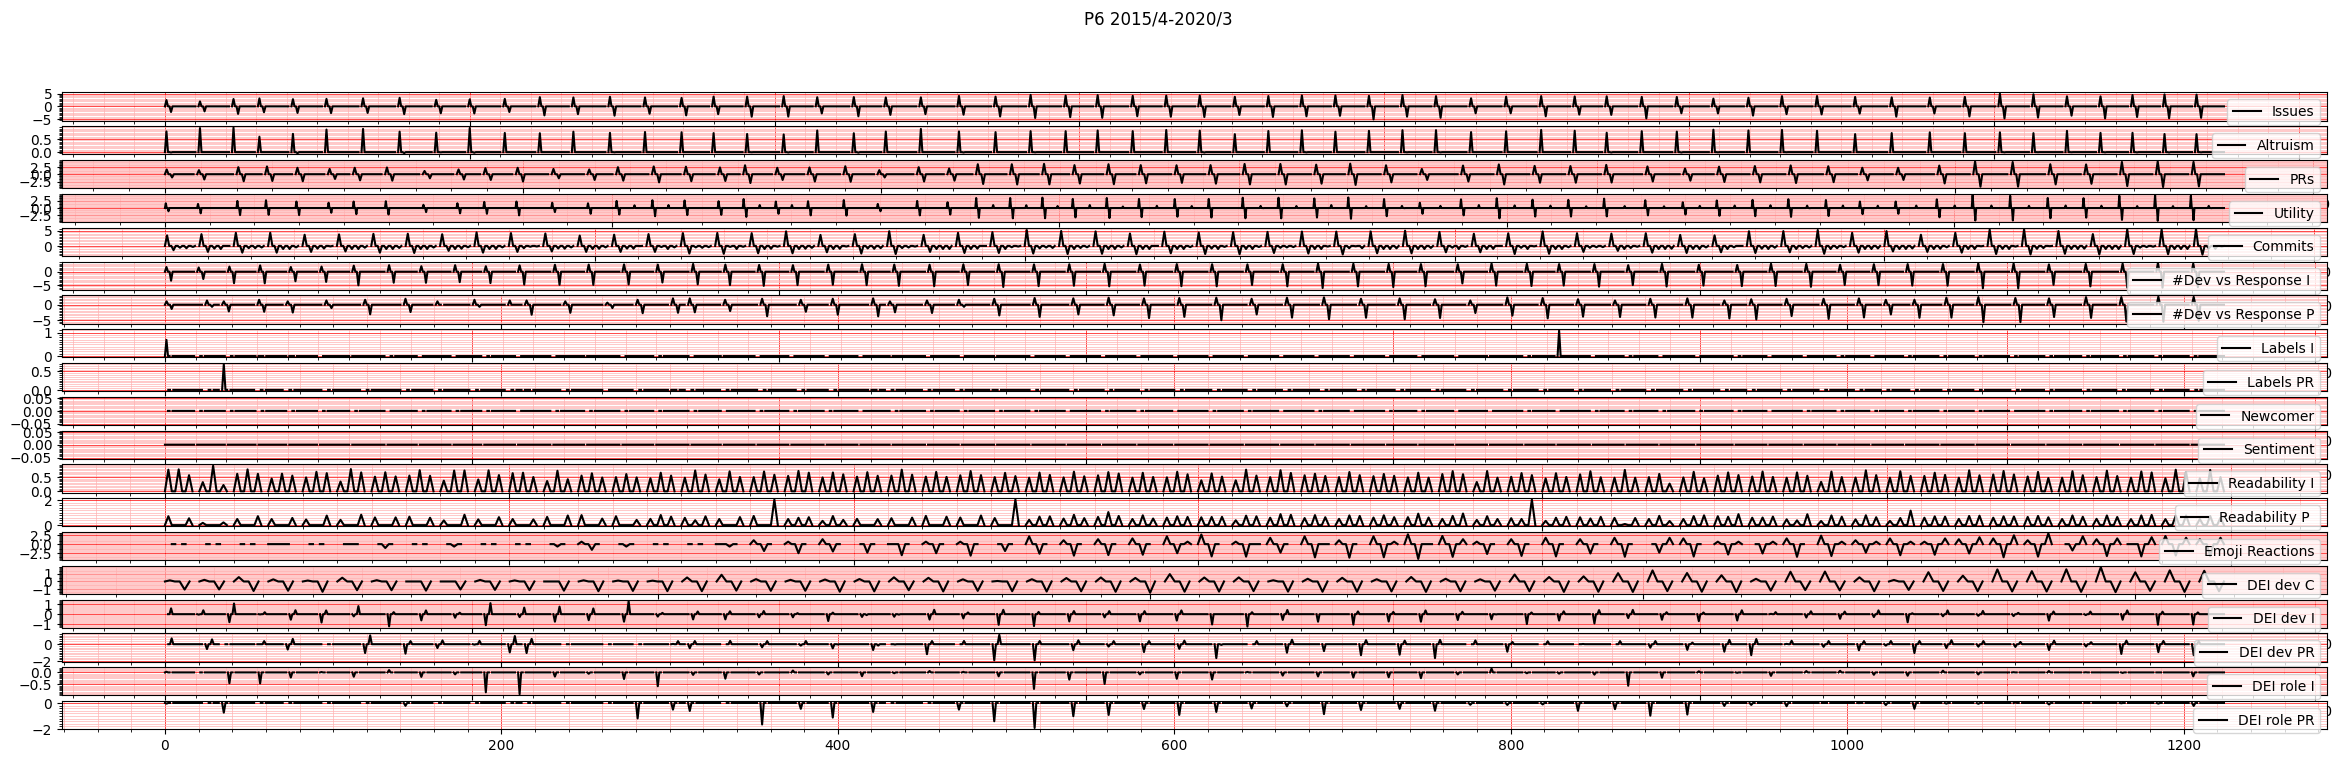

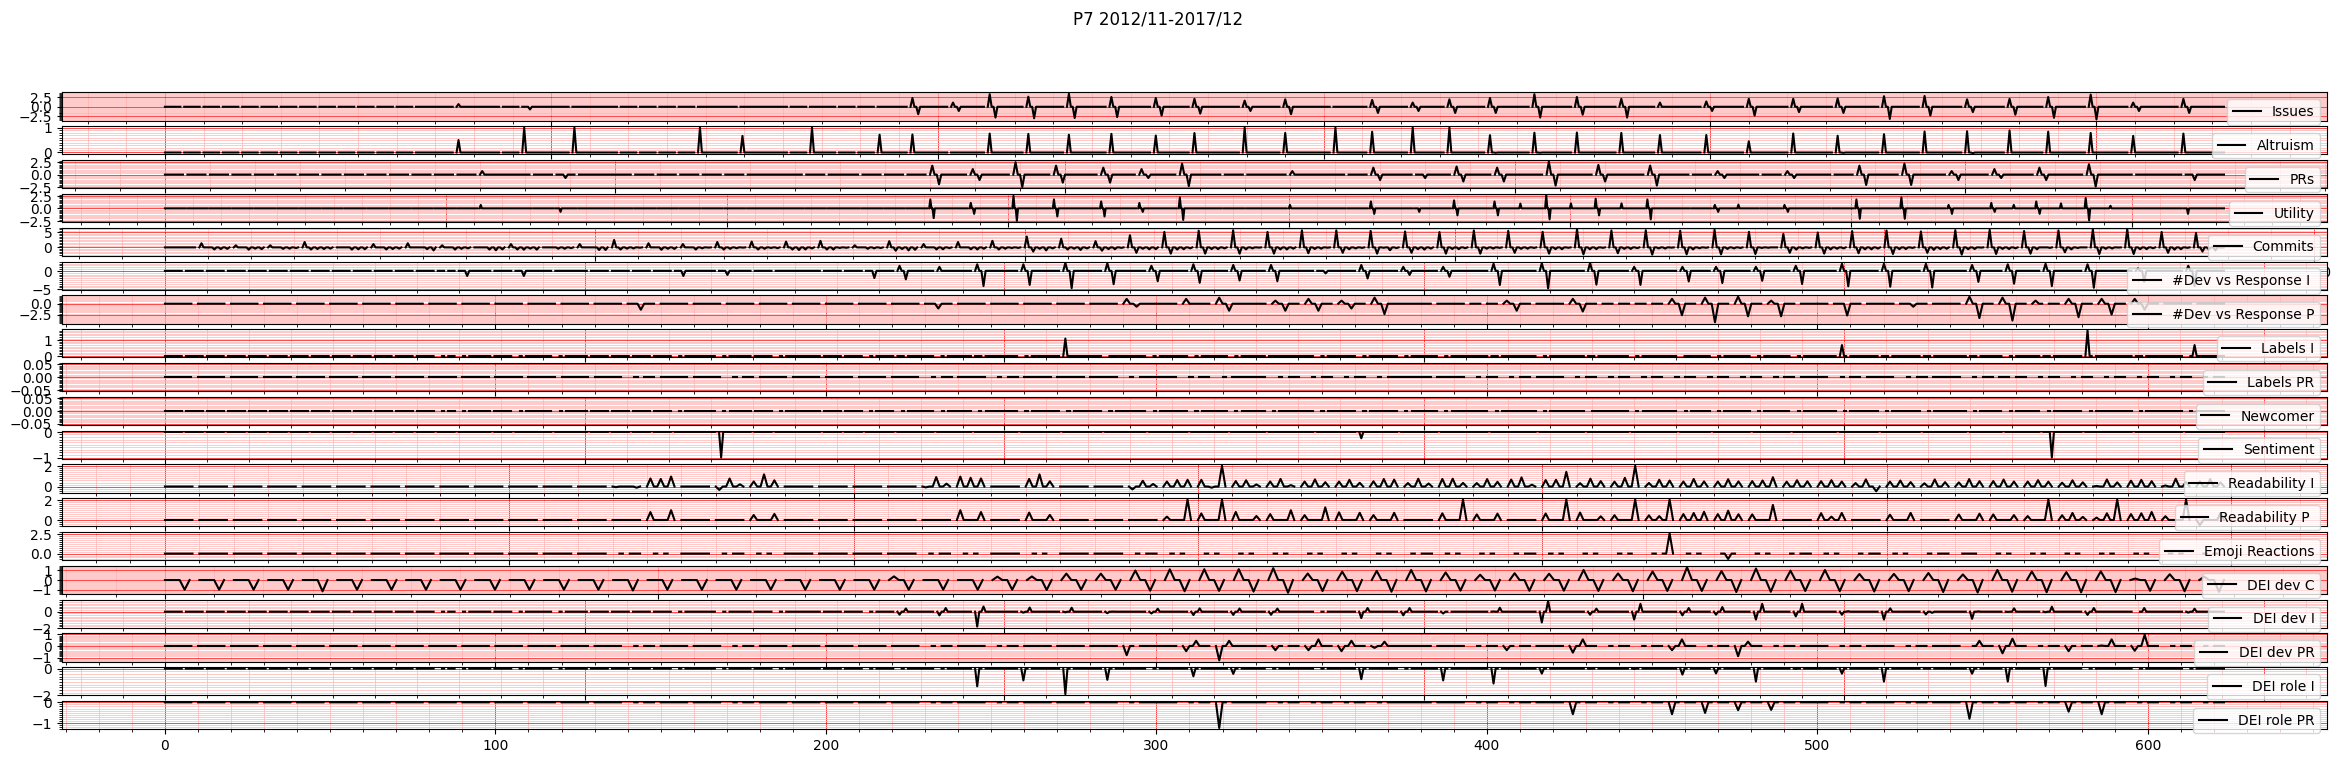

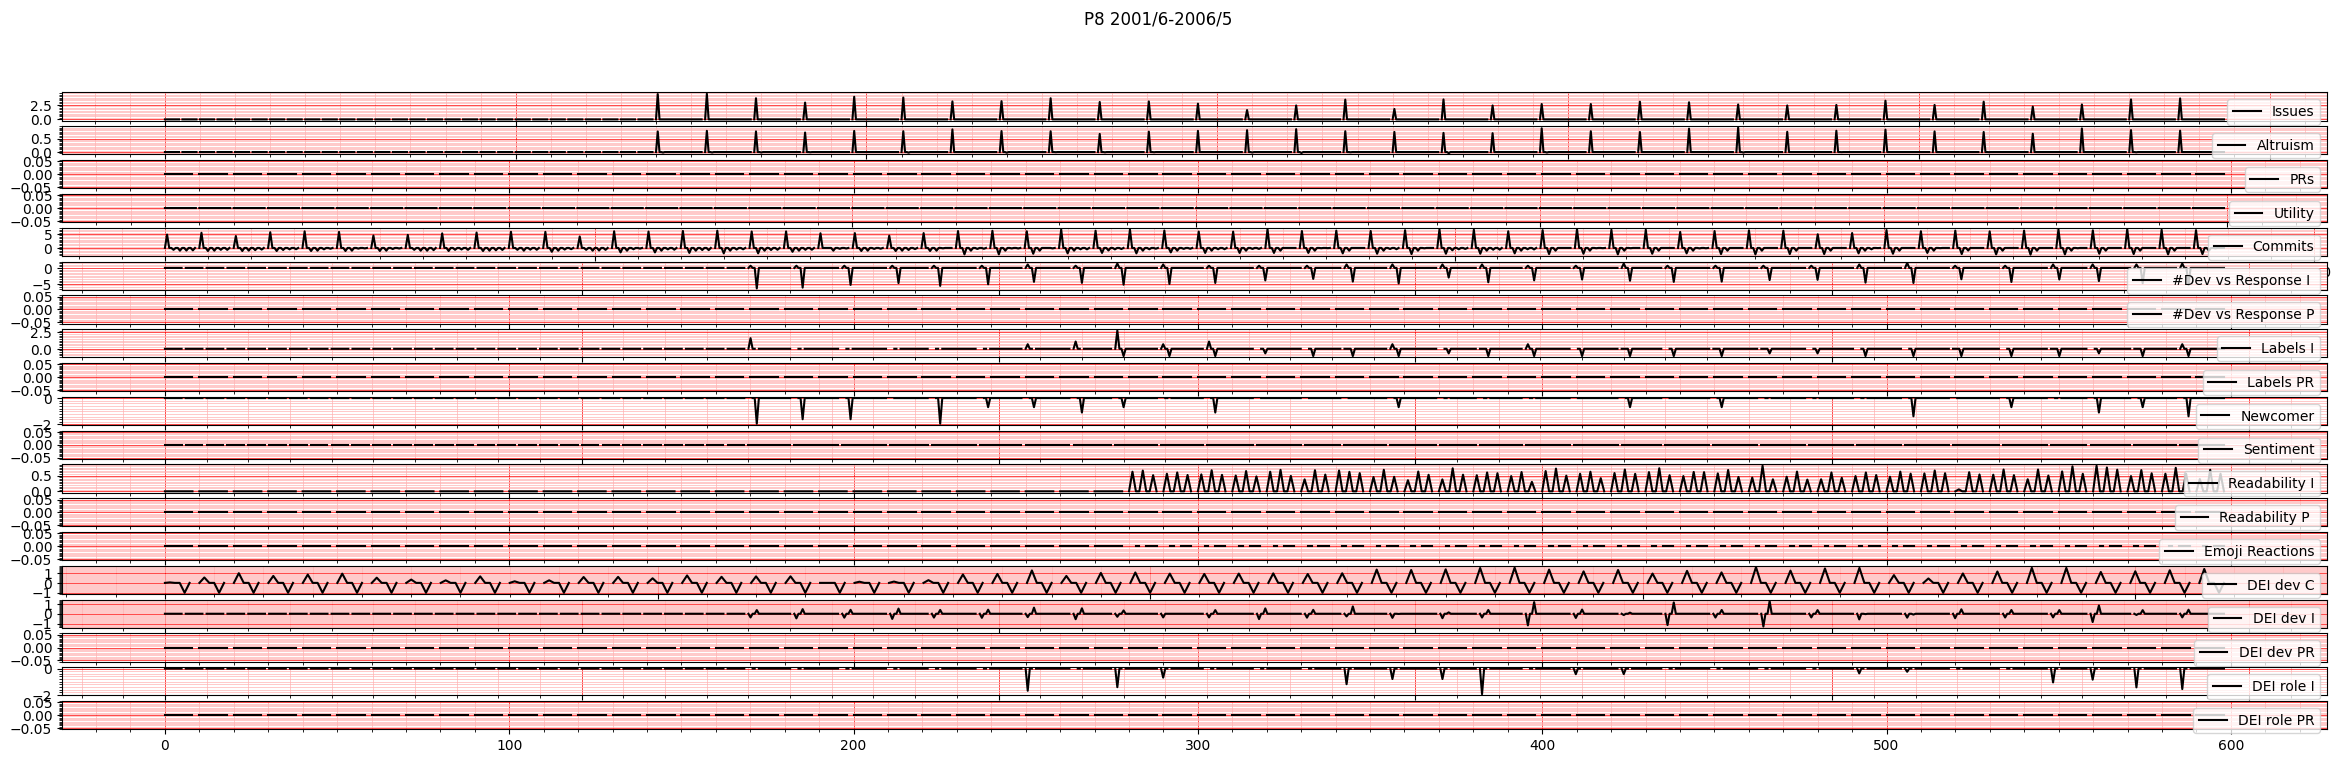

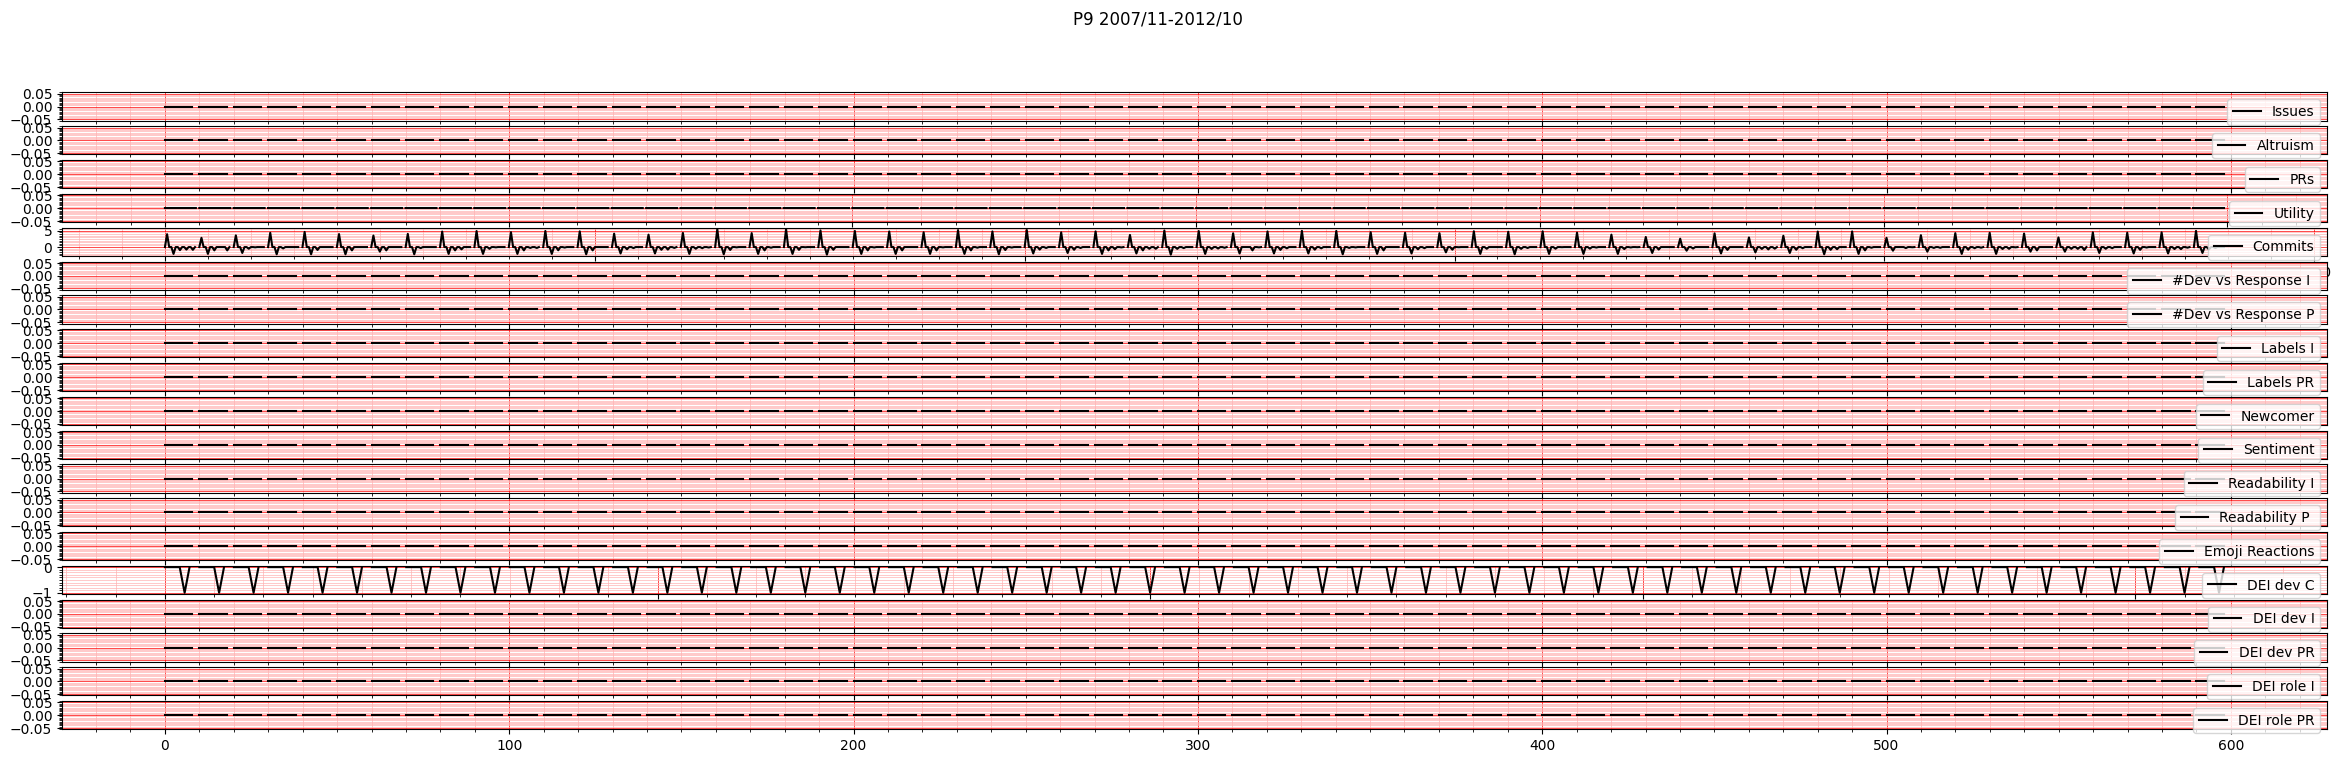

In [ ]:
for x in allz.project.unique():
    s = STG(allz[allz.project==x][:60] ,x_factor=1 );s.report(sharexy=0*1, prefix='full')

Thank you!